## SIFT on Training Dataset

These functions were formed using Opencv docs: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

In [5]:
import cv2 as cv
import numpy as np
import os

original_dir = 'archive/TRAINING/ORIGINAL'
tampered_dir = 'archive/TRAINING/TAMPERED'
dest_orig = 'picked_data/TRAINING/ORIGINAL'
dest_tamp = 'picked_data/TRAINING/TAMPERED'

original_files = os.listdir(original_dir)
tampered_files = os.listdir(tampered_dir)

sift = cv.SIFT_create()
bf = cv.BFMatcher()

for tamp_filename in tampered_files:
    orig_path = os.path.join(original_dir, tamp_filename)
    tamp_path = os.path.join(tampered_dir, tamp_filename)

    orig_img = cv.imread(orig_path)
    orig_gray= cv.cvtColor(orig_img,cv.COLOR_BGR2GRAY)
    
    tamp_img = cv.imread(tamp_path)
    tamp_gray= cv.cvtColor(tamp_img,cv.COLOR_BGR2GRAY)
    
    # https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
    kp1, des1 = sift.detectAndCompute(orig_gray, None)
    kp2, des2 = sift.detectAndCompute(tamp_gray, None)
   
    if des1 is None or des2 is None:
        print("Too hard to analyze (original)" + str(orig_path))
        print("Too hard to analyze (tampered)" + str(tamp_path))
        continue
    else:
        # https://www.geeksforgeeks.org/python-opencv-object-tracking-using-homography/#
        matches = bf.knnMatch(des1, des2, k=2)

        good = []
        for pair in matches:
            if len(pair) == 2:
                m,n = pair
                if (m.distance < 0.75 * n.distance):
                    good.append(m)
        
        if len(good) > 4:
            query_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
            train_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

            matrix, mask = cv.findHomography(query_pts, train_pts, cv.RANSAC, 5.0)

            if matrix is not None:
                inliers = np.sum(mask)

                if inliers > 1000:
                    cv.imwrite(os.path.join(dest_tamp, tamp_filename), tamp_gray)
                    cv.imwrite(os.path.join(dest_orig, tamp_filename), orig_gray)

Too hard to analyze (original)archive/TRAINING/ORIGINAL/Im3_3_r.jpg
Too hard to analyze (tampered)archive/TRAINING/TAMPERED/Im3_3_r.jpg
Too hard to analyze (original)archive/TRAINING/ORIGINAL/Im36_3_r.jpg
Too hard to analyze (tampered)archive/TRAINING/TAMPERED/Im36_3_r.jpg
Too hard to analyze (original)archive/TRAINING/ORIGINAL/Im13_2_r.jpg
Too hard to analyze (tampered)archive/TRAINING/TAMPERED/Im13_2_r.jpg
Too hard to analyze (original)archive/TRAINING/ORIGINAL/Im96_3_cm.jpg
Too hard to analyze (tampered)archive/TRAINING/TAMPERED/Im96_3_cm.jpg
Too hard to analyze (original)archive/TRAINING/ORIGINAL/Im55_4_r.jpg
Too hard to analyze (tampered)archive/TRAINING/TAMPERED/Im55_4_r.jpg
Too hard to analyze (original)archive/TRAINING/ORIGINAL/Im45_4_r.jpg
Too hard to analyze (tampered)archive/TRAINING/TAMPERED/Im45_4_r.jpg
Too hard to analyze (original)archive/TRAINING/ORIGINAL/Im3_2_r.jpg
Too hard to analyze (tampered)archive/TRAINING/TAMPERED/Im3_2_r.jpg
Too hard to analyze (original)archiv

Corrupt JPEG data: premature end of data segment


## SIFT on Validation dataset

In [9]:
import cv2 as cv
import numpy as np
import os

# For code references, refer to the block above.

original_dir_val = 'archive/VALIDATION/ORIGINAL'
tampered_dir_val = 'archive/VALIDATION/TAMPERED'
dest_orig_val = 'picked_data/VALIDATION/ORIGINAL'
dest_tamp_val = 'picked_data/VALIDATION/TAMPERED'

original_files_val = os.listdir(original_dir_val)
tampered_files_val = os.listdir(tampered_dir_val)

sift = cv.SIFT_create()
bf = cv.BFMatcher()

for tamp_filename in tampered_files_val:
    orig_path_val = os.path.join(original_dir_val, tamp_filename)
    tamp_path_val = os.path.join(tampered_dir_val, tamp_filename)
    
    val_orig_img = cv.imread(orig_path_val)
    val_orig_gray= cv.cvtColor(val_orig_img,cv.COLOR_BGR2GRAY)
    
    val_tamp_img = cv.imread(tamp_path_val)
    val_tamp_gray= cv.cvtColor(val_tamp_img,cv.COLOR_BGR2GRAY)

    
    kp1, des1 = sift.detectAndCompute(val_orig_gray, None)
    kp2, des2 = sift.detectAndCompute(val_tamp_gray, None)
   
    if des1 is None or des2 is None:
        print("Too hard to analyze (original)" + str(orig_path_val))
        print("Too hard to analyze (tampered)" + str(tamp_path_val))
        continue
    else:

        matches = bf.knnMatch(des1, des2, k=2)

        
        matchess = []
        for elem in matches:
            if len(elem) == 2: 
                m,n = elem
                if (m.distance < 0.75 * n.distance):
                    matchess.append(m)

        if len(matchess) > 4:
            query_pts = np.float32([kp1[m.queryIdx].pt for m in matchess]).reshape(-1,1,2)
            train_pts = np.float32([kp2[m.trainIdx].pt for m in matchess]).reshape(-1,1,2)

            matrix, mask = cv.findHomography(query_pts, train_pts, cv.RANSAC, 5.0)

            if matrix is not None:
                inliers = np.sum(mask)

                if inliers > 1000:
                    cv.imwrite(os.path.join(dest_tamp_val, tamp_filename), val_tamp_gray)
                    cv.imwrite(os.path.join(dest_orig_val, tamp_filename), val_orig_gray)

Too hard to analyze (original)archive/VALIDATION/ORIGINAL/Im87_1_r.jpg
Too hard to analyze (tampered)archive/VALIDATION/TAMPERED/Im87_1_r.jpg
Too hard to analyze (original)archive/VALIDATION/ORIGINAL/Im11_1_r.jpg
Too hard to analyze (tampered)archive/VALIDATION/TAMPERED/Im11_1_r.jpg
Too hard to analyze (original)archive/VALIDATION/ORIGINAL/Im62_1_cm.jpg
Too hard to analyze (tampered)archive/VALIDATION/TAMPERED/Im62_1_cm.jpg
Too hard to analyze (original)archive/VALIDATION/ORIGINAL/Im56_1_cm.jpg
Too hard to analyze (tampered)archive/VALIDATION/TAMPERED/Im56_1_cm.jpg
Too hard to analyze (original)archive/VALIDATION/ORIGINAL/Im84_1_r.jpg
Too hard to analyze (tampered)archive/VALIDATION/TAMPERED/Im84_1_r.jpg
Too hard to analyze (original)archive/VALIDATION/ORIGINAL/Im83_1_cm.jpg
Too hard to analyze (tampered)archive/VALIDATION/TAMPERED/Im83_1_cm.jpg
Too hard to analyze (original)archive/VALIDATION/ORIGINAL/Im76_1_cm.jpg
Too hard to analyze (tampered)archive/VALIDATION/TAMPERED/Im76_1_cm.jp

## CNN model

In [23]:
import pandas as pd
import numpy as np
import keras 
import keras.models as M
import keras.layers as L
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from colorama import Fore as f
#import tensorflow_addons as tfa
#from tensorflow_addons.layers import InstanceNormalization as IN

img_shape=(120,120)
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen_valid=ImageDataGenerator()

training_data=datagen.flow_from_directory('picked_data/TRAINING/',target_size=img_shape,color_mode='rgb',batch_size=20,seed=32,interpolation='bicubic')
validation_data=datagen_valid.flow_from_directory('picked_data/VALIDATION/',target_size=img_shape,color_mode='rgb',batch_size=20,seed=32,interpolation='bicubic')
training_data.reset()
batch_images, batch_labels = next(training_data)  # Get one batch of data
datagen.fit(batch_images)

Found 250 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [24]:
def make_model():
    model = M.Sequential()
    model.add(L.Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (120, 120, 3)))
    model.add(L.Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (120, 120, 3)))
    model.add(L.MaxPool2D(pool_size = (2, 2)))
    model.add(L.Dropout(0.25))
    model.add(L.Flatten())
    model.add(L.Dense(256, activation = 'relu'))
    model.add(L.Dropout(0.5))
    model.add(L.Dense(2, activation = 'softmax'))
    return model

In [25]:
model=make_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 116, 116, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,718,946 (98.11 MB)

 Trainable params: 25,718,946 (98.11 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=4)
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',patience=2)
from keras import optimizers
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(training_data,validation_data=validation_data,epochs=25)

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4939 - loss: 1.2830 - val_accuracy: 0.5000 - val_loss: 70.3625
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6184 - loss: 0.7241 - val_accuracy: 0.5000 - val_loss: 61.1378
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5532 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 32.0482
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5468 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 26.5812
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5960 - loss: 0.6719 - val_accuracy: 0.5000 - val_loss: 36.1638
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5892 - loss: 0.6725 - val_accuracy: 0.5000 - val_loss: 47.1304
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5440 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 26.5061
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5650 - loss: 0.6906 - val_accuracy: 0.5000 - va

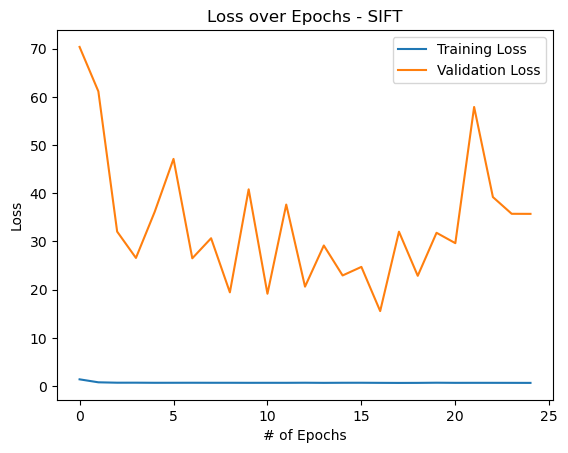

In [32]:
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']
acc=model.history.history['accuracy']
val_acc=model.history.history['val_accuracy']
epochs=[i for i in range(len(loss))]
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.legend(["Training Loss", "Validation Loss"], loc="upper right")
plt.title('Loss over Epochs - SIFT')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.show()

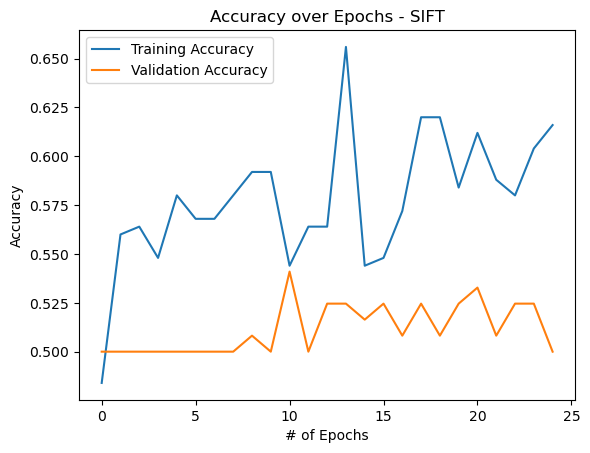

In [31]:
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.legend(["Training Accuracy", "Validation Accuracy"], loc="upper left")
plt.title('Accuracy over Epochs - SIFT')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.show()